# <span style='color:orange'>Spotify Review Sentiment Analysis</span>

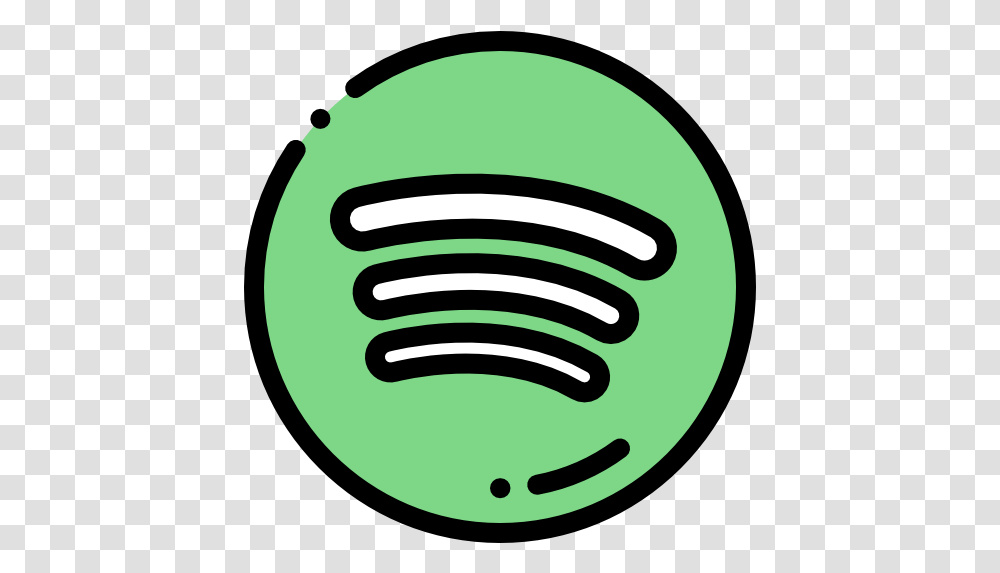

### It is one of the largest music streaming service providers, with over 422    million monthly active users,including 182 million paying subscribers, as of March 2022.  <br/>Some of them don't hesitate to share their experience using this application along with the given rating to denote how satisfied they are on Google Play Store Review.

In [ ]:
# Total_thumbsup-How many people found the review helpful
# Reply-Review reply


# Import Library

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import re
import tweepy
import matplotlib.pyplot as plt
import nltk
from tokenize import tokenize
from wordcloud import WordCloud,STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [133]:
df=pd.read_csv('B:\\reviews spotify.csv')
df


Time_submitted                                             Review  \
0      09-07-2022 15:00  Great music service, the audio is high quality...   
1      09-07-2022 14:21  Please ignore previous negative rating. This a...   
2      09-07-2022 13:27  This pop-up "Get the best Spotify experience o...   
3      09-07-2022 13:26    Really buggy and terrible to use as of recently   
4      09-07-2022 13:20  Dear Spotify why do I get songs that I didn't ...   
...                 ...                                                ...   
61589  01-01-2022 03:01  Even though it was communicated that lyrics fe...   
61590  01-01-2022 02:13  Use to be sooo good back when I had it, and wh...   
61591  01-01-2022 01:02  This app would be good if not for it taking ov...   
61592  01-01-2022 00:49  The app is good hard to navigate and won't jus...   
61593  01-01-2022 00:19  Its good but sometimes it doesnt load the musi...   

       Rating  Total_thumbsup Reply  
0           5               2   NaN  
1           5               1   NaN  
2           4               0   NaN  
3           1               1   NaN  
4           1               1   NaN  
...       ...             ...   ...  
61589       1               6   NaN  
61590       1               0   NaN  
61591       2              10   NaN  
61592       2               1   NaN  
61593       4               0   NaN  

[61594 rows x 5 columns]

## Data cleaning

In [3]:
df.rename(columns={'Time_submitted':'Date','Total_thumbsup':'R_helpful'},inplace=True)
df

Date                                             Review  \
0      09-07-2022 15:00  Great music service, the audio is high quality...   
1      09-07-2022 14:21  Please ignore previous negative rating. This a...   
2      09-07-2022 13:27  This pop-up "Get the best Spotify experience o...   
3      09-07-2022 13:26    Really buggy and terrible to use as of recently   
4      09-07-2022 13:20  Dear Spotify why do I get songs that I didn't ...   
...                 ...                                                ...   
61589  01-01-2022 03:01  Even though it was communicated that lyrics fe...   
61590  01-01-2022 02:13  Use to be sooo good back when I had it, and wh...   
61591  01-01-2022 01:02  This app would be good if not for it taking ov...   
61592  01-01-2022 00:49  The app is good hard to navigate and won't jus...   
61593  01-01-2022 00:19  Its good but sometimes it doesnt load the musi...   

       Rating  R_helpful Reply  
0           5          2   NaN  
1           5          1   NaN  
2           4          0   NaN  
3           1          1   NaN  
4           1          1   NaN  
...       ...        ...   ...  
61589       1          6   NaN  
61590       1          0   NaN  
61591       2         10   NaN  
61592       2          1   NaN  
61593       4          0   NaN  

[61594 rows x 5 columns]

In [4]:
df.isnull().sum()

Date             0
Review           0
Rating           0
R_helpful        0
Reply        61378
dtype: int64

In [5]:
df.dtypes

Date         object
Review       object
Rating        int64
R_helpful     int64
Reply        object
dtype: object

In [6]:
df1=df.drop(['Reply'],axis=1)
df1

Date                                             Review  \
0      09-07-2022 15:00  Great music service, the audio is high quality...   
1      09-07-2022 14:21  Please ignore previous negative rating. This a...   
2      09-07-2022 13:27  This pop-up "Get the best Spotify experience o...   
3      09-07-2022 13:26    Really buggy and terrible to use as of recently   
4      09-07-2022 13:20  Dear Spotify why do I get songs that I didn't ...   
...                 ...                                                ...   
61589  01-01-2022 03:01  Even though it was communicated that lyrics fe...   
61590  01-01-2022 02:13  Use to be sooo good back when I had it, and wh...   
61591  01-01-2022 01:02  This app would be good if not for it taking ov...   
61592  01-01-2022 00:49  The app is good hard to navigate and won't jus...   
61593  01-01-2022 00:19  Its good but sometimes it doesnt load the musi...   

       Rating  R_helpful  
0           5          2  
1           5          1  
2           4          0  
3           1          1  
4           1          1  
...       ...        ...  
61589       1          6  
61590       1          0  
61591       2         10  
61592       2          1  
61593       4          0  

[61594 rows x 4 columns]

In [7]:
def remtime(text):
    text = text[:10]
    return text

In [8]:
df['Date'] = df['Date'].apply(remtime)

In [9]:
df

Date                                             Review  Rating  \
0      09-07-2022  Great music service, the audio is high quality...       5   
1      09-07-2022  Please ignore previous negative rating. This a...       5   
2      09-07-2022  This pop-up "Get the best Spotify experience o...       4   
3      09-07-2022    Really buggy and terrible to use as of recently       1   
4      09-07-2022  Dear Spotify why do I get songs that I didn't ...       1   
...           ...                                                ...     ...   
61589  01-01-2022  Even though it was communicated that lyrics fe...       1   
61590  01-01-2022  Use to be sooo good back when I had it, and wh...       1   
61591  01-01-2022  This app would be good if not for it taking ov...       2   
61592  01-01-2022  The app is good hard to navigate and won't jus...       2   
61593  01-01-2022  Its good but sometimes it doesnt load the musi...       4   

       R_helpful Reply  
0              2   NaN  
1              1   NaN  
2              0   NaN  
3              1   NaN  
4              1   NaN  
...          ...   ...  
61589          6   NaN  
61590          0   NaN  
61591         10   NaN  
61592          1   NaN  
61593          0   NaN  

[61594 rows x 5 columns]

# EDA

In [10]:
def rtime(text):
    text=text[:10]
    return text

In [11]:
df1['Date'] = df1['Date'].apply(rtime)

In [12]:
df1['Date']

0        09-07-2022
1        09-07-2022
2        09-07-2022
3        09-07-2022
4        09-07-2022
            ...    
61589    01-01-2022
61590    01-01-2022
61591    01-01-2022
61592    01-01-2022
61593    01-01-2022
Name: Date, Length: 61594, dtype: object

In [13]:
f=df1.Date.value_counts().head(50)

### Top 50 date when were user give the review. 

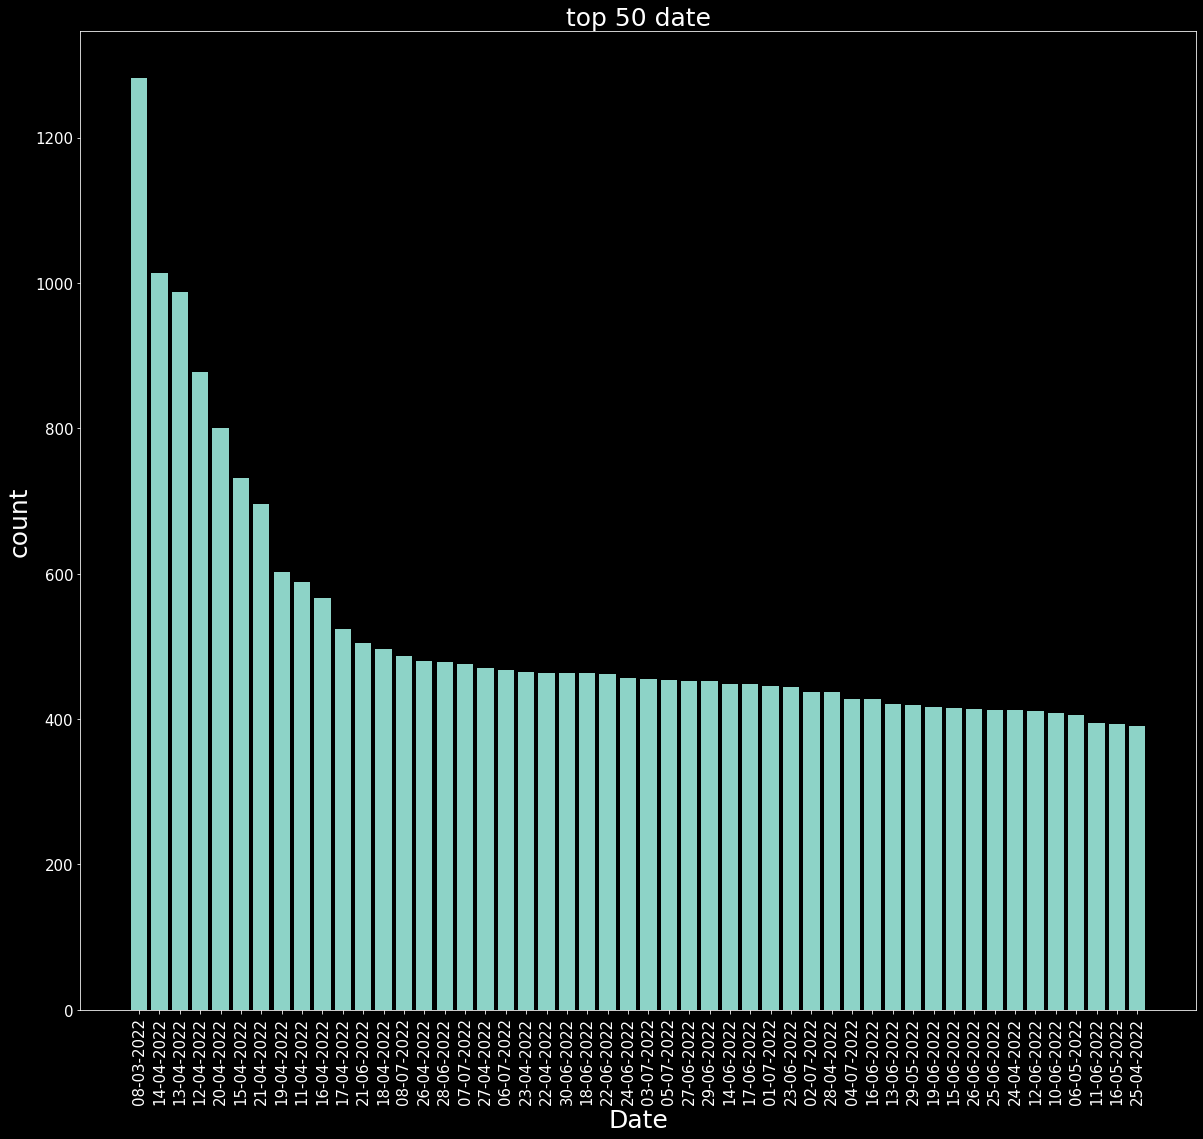

In [122]:
plt.figure(figsize=(20,18))
plt.bar(f.index,f.values)
plt.xlabel('Date',size=25)
plt.ylabel('count',size=25)
plt.title('top 50 date',size=25)
plt.xticks(rotation=90,fontsize=15);
plt.yticks(fontsize=15);


### Which rating are most?

In [16]:
df1['Rating'].value_counts()

5    22095
1    17653
4     7842
2     7118
3     6886
Name: Rating, dtype: int64

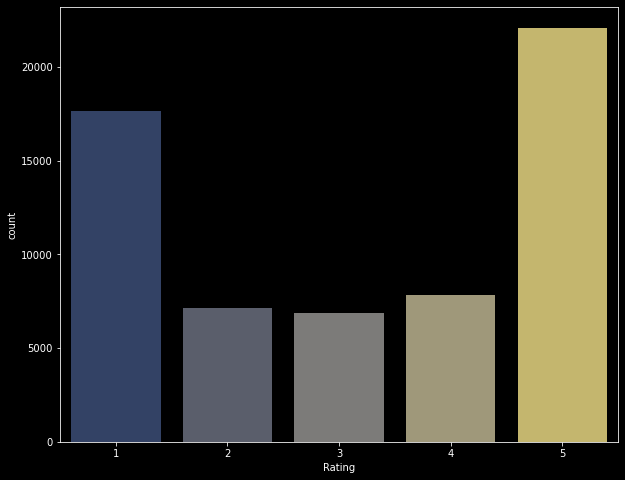

In [112]:
plt.figure(figsize=(10,8))
sns.countplot(x='Rating',color='',data=df1,palette='cividis');
# YlGn

### Which rating user liked most?¶

In [18]:
df=df.groupby('Rating').sum('R_helpful').reset_index()

In [19]:
df

Rating  R_helpful
0       1     150449
1       2      73694
2       3      90715
3       4      85137
4       5      71161

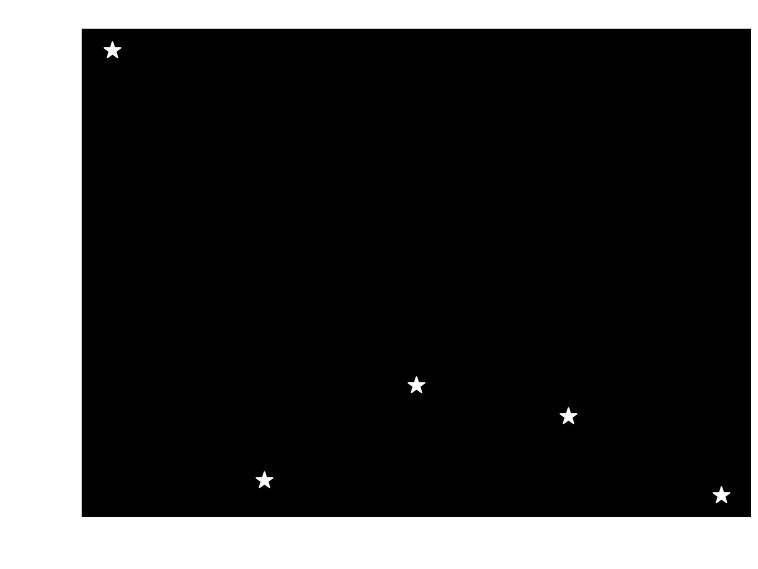

In [20]:

plt.figure(figsize=(12,9))
plt.style.use('dark_background')
sns.scatterplot(x='Rating',y='R_helpful',data=df,marker='*',s=300,color='w');
plt.xlabel('Rating',size=25);
plt.ylabel('R_helpful',size=25);
plt.title('Rating support',size=20);



 This chart show the 1 rating are most helpful for user.


# sentiment analysis

In [21]:
def cleanTxt(text):
    text=re.sub('@[A-Za-z0-9]+','',text ) #Remove mention
    text=re.sub("#",'',text) #remove #
    text=re.sub('RT[\s]+','',text) #removing retweet
    text=re.sub('https?:\/\/\S+','',text) #removing links
    return text

In [22]:
df1['Review']=df1['Review'].apply(cleanTxt)
df1['Review']


0        Great music service, the audio is high quality...
1        Please ignore previous negative rating. This a...
2        This pop-up "Get the best Spotify experience o...
3          Really buggy and terrible to use as of recently
4        Dear Spotify why do I get songs that I didn't ...
                               ...                        
61589    Even though it was communicated that lyrics fe...
61590    Use to be sooo good back when I had it, and wh...
61591    This app would be good if not for it taking ov...
61592    The app is good hard to navigate and won't jus...
61593    Its good but sometimes it doesnt load the musi...
Name: Review, Length: 61594, dtype: object

<span style='color:white'> polarity(if value equal to 0.0=netural, if value is greater the 0.0 means polarity is  positive or  less then 0.0  means negative)</span>

 

In [23]:
from textblob import TextBlob
analysis=TextBlob("Use to be sooo good back when I had it")
analysis.sentiment


Sentiment(polarity=0.35, subjectivity=0.30000000000000004)

In [24]:
#create a fumction to get the subjectivity of tweet
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity of all the tweete
def getPolarity(text):
    return TextBlob(text).sentiment.polarity



In [25]:
df1['subjectivity']=df1['Review'].apply(getSubjectivity)
df1['polarity']=df1['Review'].apply(getPolarity)


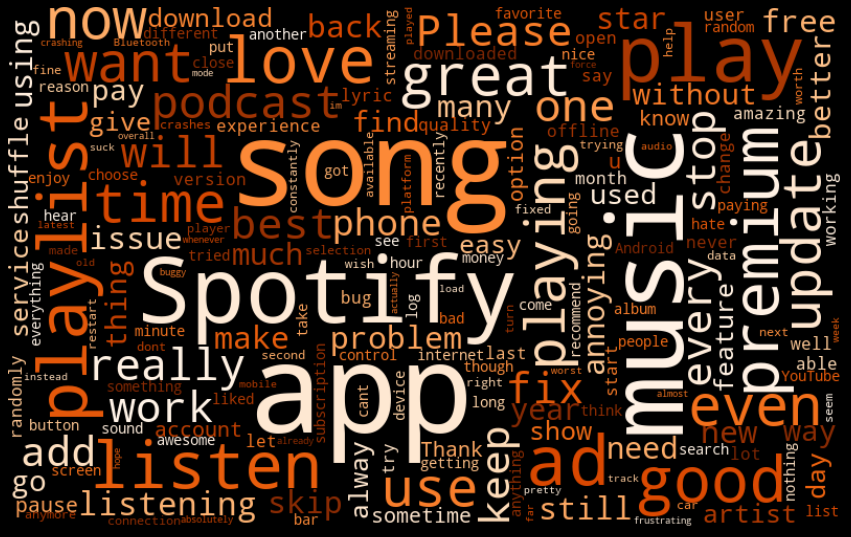

In [27]:
plt.figure(figsize=(15,19))
allwords=' '.join([i for i in df1['Review']])
Cloud=WordCloud(collocations=False,width=800,height=500,random_state=0,
                max_font_size=120,background_color="black",
                colormap="Oranges_r").generate(allwords)
plt.imshow(Cloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Create function to compute negative, positive and neutral

In [101]:
def sentiment(Review):
    if Review<0:
        return('Negative')
    elif Review==0:
        return('Netural')
    else:
        return('Positive')

In [102]:
df1['sentiment']=df1['polarity'].apply(sentiment)

In [103]:
df1

Date                                             Review  Rating  \
0      09-07-2022  Great music service, the audio is high quality...       5   
1      09-07-2022  Please ignore previous negative rating. This a...       5   
2      09-07-2022  This pop-up "Get the best Spotify experience o...       4   
3      09-07-2022    Really buggy and terrible to use as of recently       1   
4      09-07-2022  Dear Spotify why do I get songs that I didn't ...       1   
...           ...                                                ...     ...   
61589  01-01-2022  Even though it was communicated that lyrics fe...       1   
61590  01-01-2022  Use to be sooo good back when I had it, and wh...       1   
61591  01-01-2022  This app would be good if not for it taking ov...       2   
61592  01-01-2022  The app is good hard to navigate and won't jus...       2   
61593  01-01-2022  Its good but sometimes it doesnt load the musi...       4   

       R_helpful  subjectivity  polarity sentiment  
0              2      0.654667  0.440333  Positive  
1              1      0.495833  0.166667  Positive  
2              0      0.600000  0.100000  Positive  
3              1      0.483333 -0.266667  Negative  
4              1      0.000000  0.000000   Netural  
...          ...           ...       ...       ...  
61589          6      0.225000  0.225000  Positive  
61590          0      0.475000  0.400000  Positive  
61591         10      0.458333 -0.160185  Negative  
61592          1      0.535417  0.352083  Positive  
61593          0      0.675000  0.750000  Positive  

[61594 rows x 7 columns]

In [104]:
df1['sentiment'].value_counts()

Positive    40536
Negative    14260
Netural      6798
Name: sentiment, dtype: int64

In [105]:
df1.shape

(61594, 7)

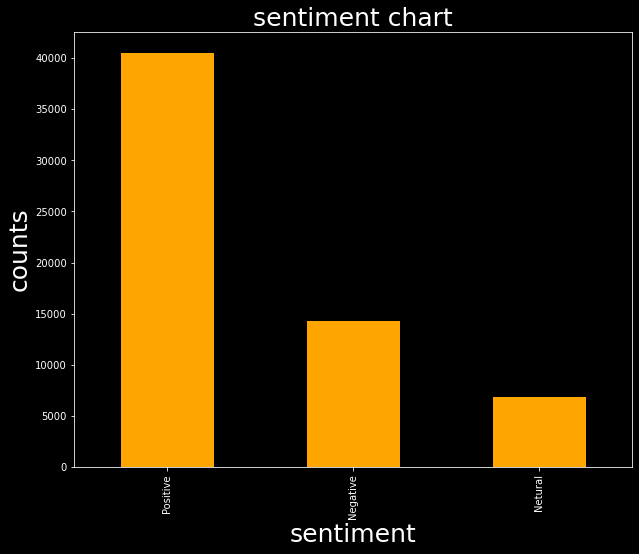

In [106]:
plt.figure(figsize=(10,8))
df1['sentiment'].value_counts().plot(kind='bar',color='orange')
plt.xlabel('sentiment',size=25)
plt.ylabel('counts',size=25)
plt.title('sentiment chart',size=25)
plt.show()

 <u>Conclusion</u>-In this graph we saw more postive value. but when i compare the user rating and (Total_thumbsup)R_helpful column i had notice most of the user found the 1 rating most helpful. i.e i change the value of polarity and subjectivity.

In [107]:
# def sentiment(polarity):
#     return 'Positive' 
# if polarity > 0.4 else ('Negative' if polarity < 0.2 else 'Neutral')

def sentiment(Review):
    if Review>0.4:
        return('Positive')
    elif Review<0.2:
        return('Negative')
    else:
        return('Neutral')

In [108]:
df1['sentiment'] = df1['polarity'].apply(sentiment)

In [109]:
df1['sentiment'].value_counts()

Negative    31843
Positive    17920
Neutral     11831
Name: sentiment, dtype: int64

In [110]:
df1['sentiment']=df1['polarity'].apply(sentiment)
df1

Date                                             Review  Rating  \
0      09-07-2022  Great music service, the audio is high quality...       5   
1      09-07-2022  Please ignore previous negative rating. This a...       5   
2      09-07-2022  This pop-up "Get the best Spotify experience o...       4   
3      09-07-2022    Really buggy and terrible to use as of recently       1   
4      09-07-2022  Dear Spotify why do I get songs that I didn't ...       1   
...           ...                                                ...     ...   
61589  01-01-2022  Even though it was communicated that lyrics fe...       1   
61590  01-01-2022  Use to be sooo good back when I had it, and wh...       1   
61591  01-01-2022  This app would be good if not for it taking ov...       2   
61592  01-01-2022  The app is good hard to navigate and won't jus...       2   
61593  01-01-2022  Its good but sometimes it doesnt load the musi...       4   

       R_helpful  subjectivity  polarity sentiment  
0              2      0.654667  0.440333  Positive  
1              1      0.495833  0.166667  Negative  
2              0      0.600000  0.100000  Negative  
3              1      0.483333 -0.266667  Negative  
4              1      0.000000  0.000000  Negative  
...          ...           ...       ...       ...  
61589          6      0.225000  0.225000   Neutral  
61590          0      0.475000  0.400000   Neutral  
61591         10      0.458333 -0.160185  Negative  
61592          1      0.535417  0.352083   Neutral  
61593          0      0.675000  0.750000  Positive  

[61594 rows x 7 columns]

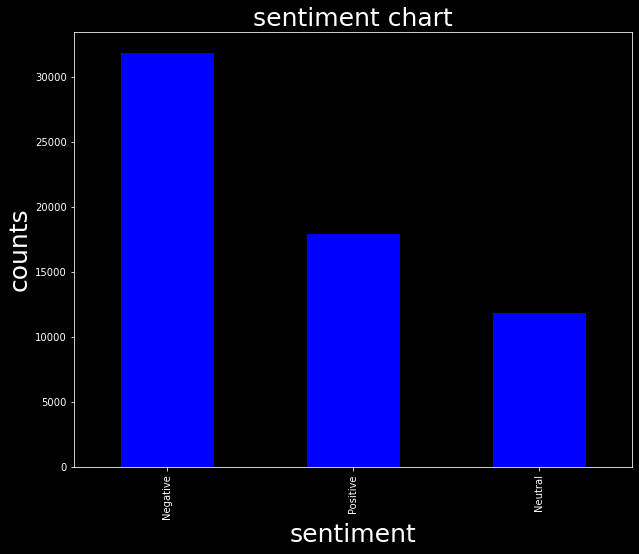

In [111]:
plt.figure(figsize=(10,8))
df1['sentiment'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('sentiment',size=25)
plt.ylabel('counts',size=25)
plt.title('sentiment chart',size=25)
plt.show()

 Now this graph show that negative comments are more.

### Here is all Negative Comment 

In [88]:
i=1
sortedDF=df1.sort_values(by=['polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if(sortedDF['sentiment'][j]=='Negative'):
        print(str(i)+')'+ sortedDF['Review'][j])
        print()
        i=i+1
        

1)Please ignore previous negative rating. This app is super great. I give it five stars+

2)This pop-up "Get the best Spotify experience on Android 12" is too annoying. Please let's get rid of this.

3)Really buggy and terrible to use as of recently

4)Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?

5)The player controls sometimes disappear for no reason. App restart forgets what I was playing but fixes the issue.

6)Still extremely slow when changing storage to external sd card.. I'm convinced this is done on purpose, spotify knows of this issue and has done NOTHING to solve it! Over time I have changed sd cards, each being faster in read, write speeds(all samsung brand). And please add "don't like song" so it will never appear again in my searches or playlists.

7)I'm deleting this app, for the following reasons: This app now has a failing business model. Whether streaming services like it, or not: the consumer doesn't want to pay

 summary:This way I did analysie sentiment analysis using Spotify review data.
    Spotify is famous for a song and podacast.In this app,most of the users have some minor 
    issues regarding features. 
    i hope you like this small project on  sentiment analysis using python.